# Q7.7

## a)

### i) 
For y = 0, sample 500 observations from two normal mixture distributions
with 10 components each corresponding to x1 and x2 as follows: 

for x1, first draw ten random means such that μi ∼ U(0, 1), i = 1, . . . , 10. 
The standard deviation is fixed in this example. 
For each observation, choose one of ten components with equal probability. 
Draw an x1 value from the corresponding component i: x1 ∼ N(μi , 0.01). Draw the next value until
500 values are drawn. 

Repeat for x2 (with different random means).

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier



In [118]:

y = np.repeat(0, 500)
rng = np.random.default_rng(seed=12345)
random_means = rng.uniform(0.0, 1.0, 10)
mean_indices = rng.integers(0,10, 500)
STDEV = 0.1
x1 = [rng.normal(random_means[rand_indx] ,STDEV) for rand_indx in mean_indices]


In [115]:
rng = np.random.default_rng(seed=999) # different seed
random_means_x2 = rng.uniform(0.0, 1.0, 10)
mean_indices_x2 = rng.integers(0,10, 500)
x2 = [rng.normal(random_means_x2[rand_indx] ,STDEV) for rand_indx in mean_indices_x2]


In [123]:
df0 = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2})
print(df0)



     y        x1        x2
0    0  0.074908  0.716520
1    0  0.848550  0.785181
2    0  0.714746 -0.005362
3    0  0.968119  0.120114
4    0  0.433866  0.827542
..  ..       ...       ...
495  0  0.544128  0.044634
496  0  0.428230  0.089427
497  0  0.245480  0.319359
498  0  0.482330  0.652380
499  0  0.327231  0.802710

[500 rows x 3 columns]


### ii) 
Repeating the same procedure, sample another 500 observations from
another normal mixture distribution with ten components for y = 1.

In [124]:
y = np.repeat(1, 500)

rng = np.random.default_rng(seed=1010) # different seed
random_means = rng.uniform(0.0, 1.0, 10)
mean_indices = rng.integers(0,10, 500)
x1 = [rng.normal(random_means[rand_indx] ,STDEV) for rand_indx in mean_indices]

rng = np.random.default_rng(seed=5050) # different seed
random_means_x2 = rng.uniform(0.0, 1.0, 10)
mean_indices_x2 = rng.integers(0,10, 500)
x2 = [rng.normal(random_means_x2[rand_indx] ,STDEV) for rand_indx in mean_indices_x2]

df1 = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2})
print(df1)

     y        x1        x2
0    1  0.599357  0.680351
1    1  0.824242  0.265755
2    1  0.808772  0.598267
3    1  0.055480  0.617796
4    1  0.876049  0.846537
..  ..       ...       ...
495  1  0.609471  0.676482
496  1  1.025710  0.521569
497  1  0.568633  0.641731
498  1  0.144766  0.374721
499  1  0.535917  0.599070

[500 rows x 3 columns]


### iii) 
Sample 1000 observations for 100 uniformly distributed noise variables as
qi ∼ U(0, 1), i = 1, . . . , 100.

In [130]:
# Noise variables 
rng = np.random.default_rng(seed=1) # different seed
q = [rng.uniform(0.0, 1.0, 1000) for i in range(0,100)]

### Plots

#### Plot #1

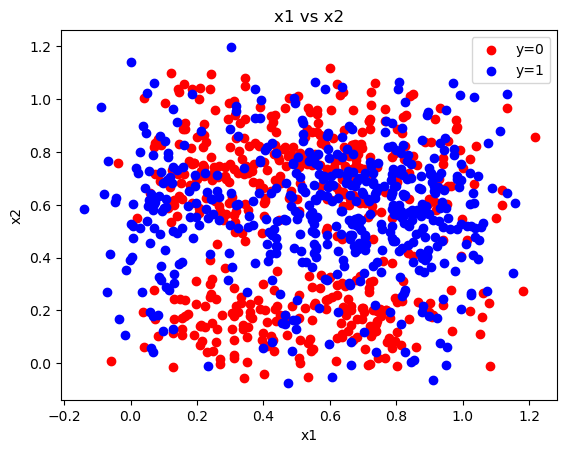

In [160]:
# PL

plt.scatter(df0.x1, df0.x2, color="red", label="y=0")
plt.scatter(df1.x1, df1.x2, color="blue", label="y=1")

plt.title("x1 vs x2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc="upper right")


#### Plot #2

In [158]:
y0q1 = q[0][:500] # colored red
y1q1 = q[0][500:] # colored blue

y0q2 = q[1][:500] # colored red
y1q2 = q[1][500:] # colored blue

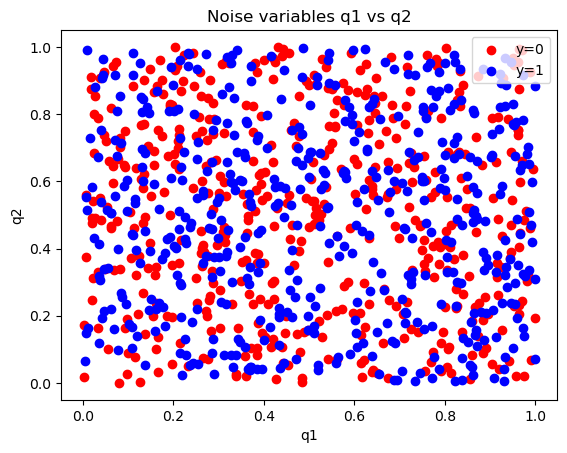

In [162]:
plt.scatter(y0q1, y0q2, color="red", label="y=0")
plt.scatter(y1q1, y1q2, color="blue", label="y=1")

plt.title("Noise variables q1 vs q2")
plt.xlabel("q1")
plt.ylabel("q2")
plt.legend(loc="upper right")


#### Plot#3

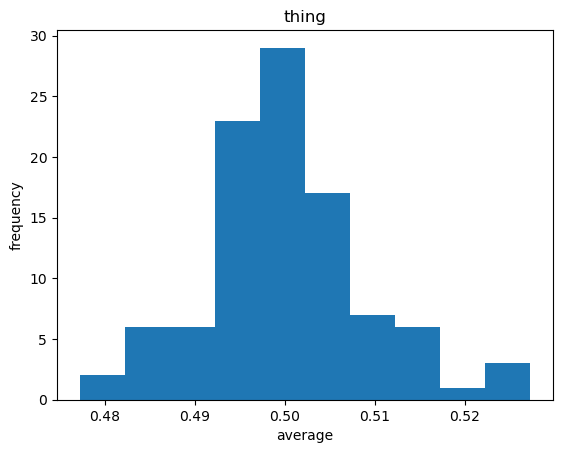

In [170]:
q_means = [np.mean(qi) for qi in q]
plt.hist(q_means)
plt.title("Mean frequencies of noise variables")
plt.xlabel("Mean")
plt.ylabel("Frequency")
plt.show()

## b)
Look at the two scatter plots in the previous part. 

For each plot, think about how kNN would work just with those two variables.

* For plot #1 (x1 vs x2), kNN would have some success since there are dense areas where the blue dots and the red dots are concentrated, ie close to neighbours of the same color. 

* For plot #2 (q1 vs q2), kNN would not predict that well because there are no concentrations of points of the same color, instead, blue dots and red dots are scattered randomly on the scatterplot. 


Why should the kNN test error increase when you add the two noise variables to x1 and x2?
* Because the noise from noise variables q1 and q2 is random and not in a specific direction, therfore adding them to x1 and x2 will scatter the points in a random direction and ruin the clusters of concentrated dots of the same color. This in turn, means that kNN predictions will get worse, and so the test error should increase.

## c)
Fit kNN models with k = 15 as a function of x1, x2 and a subset of pn noise
variables, where pn = 0, 10, 20, . . . , 100. That is, fit models with 0, 10, 20,
30, etc. noise variables in addition to the two x-variables. For each of the ten
models, evaluate the test error (fraction of misclassified observations). Note:
k = 15 is suggested but other values could be chosen. Plot the test error as a
function of the number of noise variables used. Comment

In [185]:
for i in range(0,100):
    df0['q' + str(i+1)] = q[i][:500]
    df1['q' + str(i+1)] = q[i][500:]

In [198]:
# stratified test_train split. 
# 250 random observations from y=0
train_set_y0, test_set_y0 = train_test_split(df0,random_state=42,test_size=0.5) 

# 250 random observations from y=1
train_set_y1, test_set_y1 = train_test_split(df1,random_state=42,test_size=0.5)

train_set = pd.concat([train_set_y0, train_set_y1], ignore_index=True, axis=0)
test_set = pd.concat([test_set_y0, test_set_y1], ignore_index=True, axis=0)

In [272]:
k = 15
y_train = train_set["y"].to_numpy()
y_actual = test_set["y"].to_numpy()
errors = []
for pn in range(0, 11):
    pn = pn*10
    lim = pn+3
    Xtrain = train_set.iloc[:,1:lim].to_numpy()
    Xtest = test_set.iloc[:,1:lim].to_numpy()
    knn = KNeighborsClassifier(n_neighbors=k)
    KNNfit = knn.fit(Xtrain, y_train)
    y_predicted = KNNfit.predict(Xtest)
    test_error = 0
    for i in range(0,500):
        if y_predicted[i] != y_actual[i]:
            test_error+=1
            # misclassification
    test_error /= 500
    errors.append(test_error)

[0.338, 0.478, 0.494, 0.53, 0.512, 0.502, 0.512, 0.51, 0.524, 0.498, 0.512]


Text(0, 0.5, 'Test error')

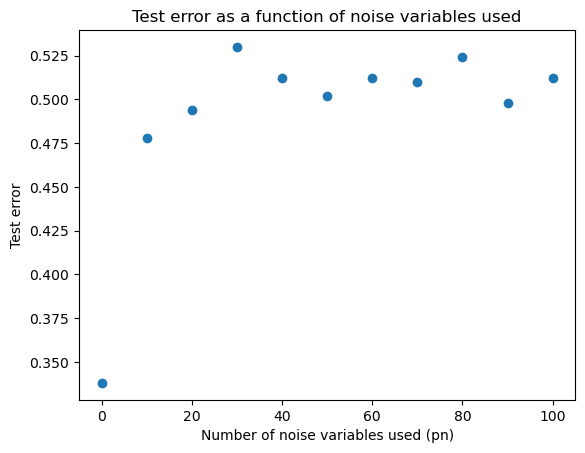

In [279]:
number_noise_vars_used = [i*10 for i in range(0,11)]
print(errors)
plt.scatter(number_noise_vars_used, errors)
plt.title("Test error as a function of noise variables used")
plt.xlabel("Number of noise variables used (pn)")
plt.ylabel("Test error")

**Comments**

* As expected, the least error is obtained when there are no noise variables at pn=0.
* After introducing noise variables, the test error increases significanlty, as expected.
